# Lung Cancer Level Detection

#### The aim of this project is to build a Machine Learning Model which can predict the level of your lung cancer based on your habits and symptons. 

# Step 1 : Import all the required Libraries

1)<b>Pandas</b> - In computer programming, pandas is a software library written for the Python programming language for data manipulation and analysis and storing in a proper way. In particular, it offers data structures and operations for manipulating numerical tables and time series.

2)<b>Scikit-learn (formerly scikits.learn)</b> -  is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy. The library is built upon the SciPy (Scientific Python) that must be installed before you can use scikit-learn.

3)<b>Pickle</b>- Python pickle module is used for serializing and de-serializing a Python object structure. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

4)<b>Seaborn</b> - Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

5)<b>Matplotlib</b> - Matplotlib is a cross-platform, data visualization and graphical plotting library for Python and its numerical extension NumPy. As such, it offers a viable open source alternative to MATLAB. Developers can also use matplotlib's APIs (Application Programming Interfaces) to embed plots in GUI applications.

In [1]:
#Loading Libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import sklearn.linear_model 
import sklearn
import pickle
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings

#  Step 2 - Reading Dataset and analysing basic information about it.

In [4]:
#Loading the dataset
try:
    df = pd.read_csv('lung_cancer_updated.csv')
    print('Data read done successfully...')
except (FileNotFoundError, IOError):
    print("Wrong file or file path")

Data read done successfully...


In [5]:
df.head()

,Age,Gender,Alcohol use,Dust Allergy,Genetic Risk,chronic Lung Disease,Smoking,Chest Pain,Coughing of Blood,Shortness of Breath,Level
0,33,1,4,5,3,2,3,2,4,2,Low
1,17,1,1,5,4,2,2,2,3,7,Medium
2,35,1,5,6,5,4,2,4,8,9,High
3,37,1,7,7,6,7,7,7,8,3,High
4,46,1,8,7,7,6,8,7,9,4,High


In [4]:
#After looking above data we can observe that
print ('The dataset has {0} rows and {1} columns'.format(df.shape[0],df.shape[1]))

The dataset has 1000 rows and 25 columns


### We noticed that (level) is our target variable and others are independent variable.As we can see that our target variable is a label so, we have to apply classification algorithm to build a model. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Patient Id                1000 non-null   object
 1   Age                       1000 non-null   int64 
 2   Gender                    1000 non-null   int64 
 3   Air Pollution             1000 non-null   int64 
 4   Alcohol use               1000 non-null   int64 
 5   Dust Allergy              1000 non-null   int64 
 6   OccuPational Hazards      1000 non-null   int64 
 7   Genetic Risk              1000 non-null   int64 
 8   chronic Lung Disease      1000 non-null   int64 
 9   Balanced Diet             1000 non-null   int64 
 10  Obesity                   1000 non-null   int64 
 11  Smoking                   1000 non-null   int64 
 12  Passive Smoker            1000 non-null   int64 
 13  Chest Pain                1000 non-null   int64 
 14  Coughing of Blood        

#### With this info function we can know that whether there are null values available on any column or not and we can know which types of data type are present like: integer and object. 

### Observation:
#### We have 23 columns of integer datatypes and 2 columns of object datatype. Here patient id is a variable which does not effect the dataset and with that machine can learn wrongly so we have to remove it. 


In [6]:
df = df.drop(['Patient Id'],axis=1)


# Step 3 - Descriptive Analysis

### Things we are going to do in this step: 

1. Mean
2. Median
3. Mode
4. Standard Deviation
5. Variance
6. Null Values
7. NaN Values
8. Min value
9. Max value
10. Count Value 
11. Correlation 
12. Skewness

In [7]:
df.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,4.859000,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.427965,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,7.000000,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000


### Mean
The mean is the arithmetic average, and it is probably the measure of central tendency that you are most familiar.

In [8]:
df.mean()

C:\Users\nuyap\AppData\Local\Temp\ipykernel_19484\3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


Age                         37.174
Gender                       1.402
Air Pollution                3.840
Alcohol use                  4.563
Dust Allergy                 5.165
OccuPational Hazards         4.840
Genetic Risk                 4.580
chronic Lung Disease         4.380
Balanced Diet                4.491
Obesity                      4.465
Smoking                      3.948
Passive Smoker               4.195
Chest Pain                   4.438
Coughing of Blood            4.859
Fatigue                      3.856
Weight Loss                  3.855
Shortness of Breath          4.240
Wheezing                     3.777
Swallowing Difficulty        3.746
Clubbing of Finger Nails     3.923
Frequent Cold                3.536
Dry Cough                    3.853
Snoring                      2.926
dtype: float64

### Median
The median is the middle value. It is the value that splits the dataset in half.

In [9]:
df.median()

C:\Users\nuyap\AppData\Local\Temp\ipykernel_19484\530051474.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.median()


Age                         36.0
Gender                       1.0
Air Pollution                3.0
Alcohol use                  5.0
Dust Allergy                 6.0
OccuPational Hazards         5.0
Genetic Risk                 5.0
chronic Lung Disease         4.0
Balanced Diet                4.0
Obesity                      4.0
Smoking                      3.0
Passive Smoker               4.0
Chest Pain                   4.0
Coughing of Blood            4.0
Fatigue                      3.0
Weight Loss                  3.0
Shortness of Breath          4.0
Wheezing                     4.0
Swallowing Difficulty        4.0
Clubbing of Finger Nails     4.0
Frequent Cold                3.0
Dry Cough                    4.0
Snoring                      3.0
dtype: float64

### Mode 
The mode is the value that occurs the most frequently in your data set. On a bar chart, the mode is the highest bar. If the data have multiple values that are tied for occurring the most frequently, you have a multimodal distribution. If no value repeats, the data do not have a mode.

In [10]:
df.mode()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,35,1,6,2,7,7,7,6,7,7,...,3,2,2,2,1,2,3,2,2,High


### Standard Deviation
The standard deviation is the average amount of variability in your dataset.It tells you, on average, how far each data point lies from the mean. The larger the standard deviation, the more variable the data set is and if zero variance then there is no variability in the dataset that means there no use of that dataset.

In [11]:
df.std()

C:\Users\nuyap\AppData\Local\Temp\ipykernel_19484\3390915376.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.std()


Age                         12.005493
Gender                       0.490547
Air Pollution                2.030400
Alcohol use                  2.620477
Dust Allergy                 1.980833
OccuPational Hazards         2.107805
Genetic Risk                 2.126999
chronic Lung Disease         1.848518
Balanced Diet                2.135528
Obesity                      2.124921
Smoking                      2.495902
Passive Smoker               2.311778
Chest Pain                   2.280209
Coughing of Blood            2.427965
Fatigue                      2.244616
Weight Loss                  2.206546
Shortness of Breath          2.285087
Wheezing                     2.041921
Swallowing Difficulty        2.270383
Clubbing of Finger Nails     2.388048
Frequent Cold                1.832502
Dry Cough                    2.039007
Snoring                      1.474686
dtype: float64

### Variance
The variance is the average of squared deviations from the mean. A deviation from the mean is how far a score lies from the mean.Variance is the square of the standard deviation. This means that the units of variance are much larger than those of a typical value of a data set.

In [12]:
df.var()

C:\Users\nuyap\AppData\Local\Temp\ipykernel_19484\1568254755.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.var()


Age                         144.131856
Gender                        0.240637
Air Pollution                 4.122523
Alcohol use                   6.866898
Dust Allergy                  3.923699
OccuPational Hazards          4.442843
Genetic Risk                  4.524124
chronic Lung Disease          3.417017
Balanced Diet                 4.560479
Obesity                       4.515290
Smoking                       6.229526
Passive Smoker                5.344319
Chest Pain                    5.199355
Coughing of Blood             5.895014
Fatigue                       5.038302
Weight Loss                   4.868844
Shortness of Breath           5.221622
Wheezing                      4.169440
Swallowing Difficulty         5.154639
Clubbing of Finger Nails      5.702774
Frequent Cold                 3.358062
Dry Cough                     4.157549
Snoring                       2.174699
dtype: float64

### Null Values 

In [13]:
df.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

### Nan Values


In [14]:
df.isna().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

### Min Values 

In [15]:
df.min()

Age                           14
Gender                         1
Air Pollution                  1
Alcohol use                    1
Dust Allergy                   1
OccuPational Hazards           1
Genetic Risk                   1
chronic Lung Disease           1
Balanced Diet                  1
Obesity                        1
Smoking                        1
Passive Smoker                 1
Chest Pain                     1
Coughing of Blood              1
Fatigue                        1
Weight Loss                    1
Shortness of Breath            1
Wheezing                       1
Swallowing Difficulty          1
Clubbing of Finger Nails       1
Frequent Cold                  1
Dry Cough                      1
Snoring                        1
Level                       High
dtype: object

### Max Values 

In [16]:
df.max()

Age                             73
Gender                           2
Air Pollution                    8
Alcohol use                      8
Dust Allergy                     8
OccuPational Hazards             8
Genetic Risk                     7
chronic Lung Disease             7
Balanced Diet                    7
Obesity                          7
Smoking                          8
Passive Smoker                   8
Chest Pain                       9
Coughing of Blood                9
Fatigue                          9
Weight Loss                      8
Shortness of Breath              9
Wheezing                         8
Swallowing Difficulty            8
Clubbing of Finger Nails         9
Frequent Cold                    7
Dry Cough                        7
Snoring                          7
Level                       Medium
dtype: object

### Correlation
Correlation is an indication about the changes between two variables. In our previous chapters, we have discussed Pearson's Correlation coefficients and the importance of Correlation too.

In [17]:
df.corr()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Coughing of Blood,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring
Age,1.000000,-0.202086,0.099494,0.151742,0.035202,0.062177,0.073151,0.128952,0.004863,0.034337,...,0.053006,0.095059,0.106946,0.035329,-0.095354,-0.105833,0.039258,-0.012706,0.012128,-0.004700
Gender,-0.202086,1.000000,-0.246912,-0.227636,-0.204312,-0.192343,-0.222727,-0.205061,-0.099741,-0.123813,...,-0.146505,-0.116467,-0.057993,-0.045972,-0.076304,-0.058324,-0.034219,-0.000526,-0.123001,-0.181618
Air Pollution,0.099494,-0.246912,1.000000,0.747293,0.637503,0.608924,0.705276,0.626701,0.524873,0.601468,...,0.607829,0.211724,0.258016,0.269558,0.055368,-0.080918,0.241065,0.174539,0.261489,-0.021343
Alcohol use,0.151742,-0.227636,0.747293,1.000000,0.818644,0.878786,0.877210,0.763576,0.653352,0.669312,...,0.667612,0.237245,0.207851,0.435785,0.180817,-0.114073,0.414992,0.180778,0.211277,0.122694
Dust Allergy,0.035202,-0.204312,0.637503,0.818644,1.000000,0.835860,0.787904,0.619556,0.647197,0.700676,...,0.625291,0.332472,0.321756,0.518682,0.304850,0.031141,0.345714,0.219389,0.300195,0.052844
OccuPational Hazards,0.062177,-0.192343,0.608924,0.878786,0.835860,1.000000,0.893049,0.858284,0.691509,0.722191,...,0.645947,0.267844,0.176226,0.366482,0.178925,-0.002853,0.366447,0.077166,0.159887,0.022916
Genetic Risk,0.073151,-0.222727,0.705276,0.877210,0.787904,0.893049,1.000000,0.836231,0.679905,0.729826,...,0.632236,0.230530,0.271743,0.458200,0.204973,-0.062948,0.357815,0.087092,0.194399,-0.056831
chronic Lung Disease,0.128952,-0.205061,0.626701,0.763576,0.619556,0.858284,0.836231,1.000000,0.622632,0.601754,...,0.602987,0.247697,0.104080,0.182426,0.057214,0.007279,0.298023,0.028759,0.114161,0.043375
Balanced Diet,0.004863,-0.099741,0.524873,0.653352,0.647197,0.691509,0.679905,0.622632,1.000000,0.706922,...,0.745054,0.400678,-0.006544,0.343623,0.063930,0.046807,0.041967,0.263931,0.331995,0.152677
Obesity,0.034337,-0.123813,0.601468,0.669312,0.700676,0.722191,0.729826,0.601754,0.706922,1.000000,...,0.814805,0.552788,0.313495,0.406203,0.094287,0.127213,0.149093,0.288368,0.200618,0.039422


### Skewness
Skewness is a measure of the asymmetry of a distribution. A distribution is asymmetrical when its left and right side are not mirror images. A distribution can have right (or positive), left (or negative), or zero skewness

In [18]:
def right_nor_left(df, int64_lst):
    
    temp_skewness = ['column', 'skewness_value', 'skewness (+ve or -ve)']
    temp_skewness_values  = []
    
    temp_total = ["positive (+ve) skewed", "normal distrbution" , "negative (-ve) skewed"]
    positive = 0
    negative = 0
    normal = 0
    
    for value in int64_lst:
    
        rs = round(df[value].skew(),4)

        if rs > 0:
            temp_skewness_values.append([value,rs , "positive (+ve) skewed"])   
            positive = positive + 1

        elif rs == 0:
            temp_skewness_values.append([value,rs,"normal distrbution"])
            normal = normal + 1

        elif rs < 0:
            temp_skewness_values.append([value,rs, "negative (-ve) skewed"])
            negative = negative + 1
    
    skewness_df =  pd.DataFrame(temp_skewness_values, columns=temp_skewness) 
    skewness_total_df =  pd.DataFrame([[positive, normal, negative]], columns=temp_total) 
    
    return skewness_df, skewness_total_df

In [19]:
int64_cols = ['int64']
int64_lst_col = list(df.select_dtypes(include=int64_cols).columns)

skew_df,skew_total_df = right_nor_left(df, int64_lst_col)

In [20]:
skew_df

,column,skewness_value,skewness (+ve or -ve)
0,Age,0.5511,positive (+ve) skewed
1,Gender,0.4004,positive (+ve) skewed
2,Air Pollution,0.1255,positive (+ve) skewed
3,Alcohol use,-0.0164,negative (-ve) skewed
4,Dust Allergy,-0.6447,negative (-ve) skewed
5,OccuPational Hazards,-0.2345,negative (-ve) skewed
6,Genetic Risk,-0.1267,negative (-ve) skewed
7,chronic Lung Disease,-0.2205,negative (-ve) skewed
8,Balanced Diet,-0.0645,negative (-ve) skewed
9,Obesity,0.0288,positive (+ve) skewed


### With the statistical analysis we have found that the data have a lot of skewness in them mostly are positively skewed. 

# Data Preprocessing and Data Cleaning

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1000 non-null   int64 
 1   Gender                    1000 non-null   int64 
 2   Air Pollution             1000 non-null   int64 
 3   Alcohol use               1000 non-null   int64 
 4   Dust Allergy              1000 non-null   int64 
 5   OccuPational Hazards      1000 non-null   int64 
 6   Genetic Risk              1000 non-null   int64 
 7   chronic Lung Disease      1000 non-null   int64 
 8   Balanced Diet             1000 non-null   int64 
 9   Obesity                   1000 non-null   int64 
 10  Smoking                   1000 non-null   int64 
 11  Passive Smoker            1000 non-null   int64 
 12  Chest Pain                1000 non-null   int64 
 13  Coughing of Blood         1000 non-null   int64 
 14  Fatigue                  

### As we can see that there are no null and nan values.


# Data Visualization

# In this section we will plot various graphs and with the help of those graph we will analyse the data more effectively and properly.

### Graphs we are going to develop in this step are:

### 1)Histogram of all columns to check the distrubution of the columns
### 2)Distplot or distribution plot of all columns to check the variation in the data distribution
### 3)Heatmap to calculate correlation within feature variables
### 4)Boxplot to find out outlier in the feature columns

### Histogram 

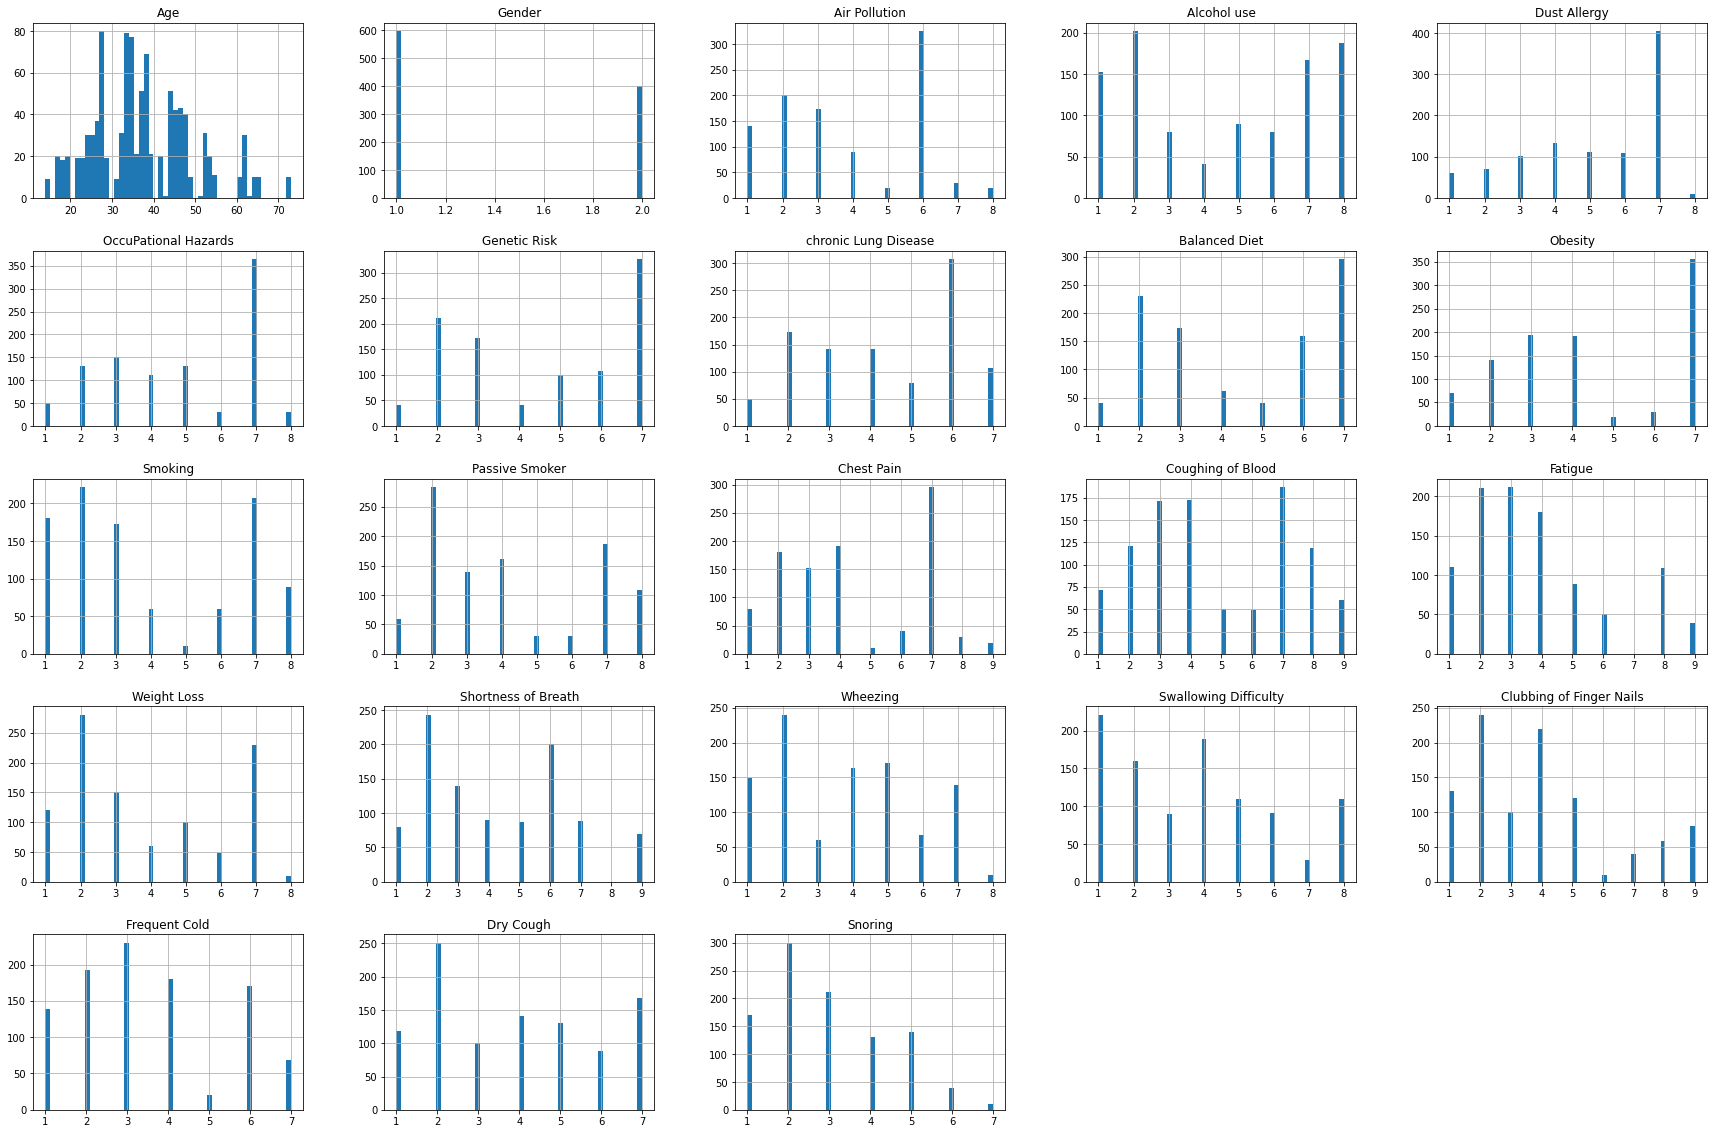

In [22]:
# Distribution in attributes
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(30,20))
plt.show()

### Distplot 

C:\Users\nuyap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nuyap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nuyap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

C:\Users\nuyap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


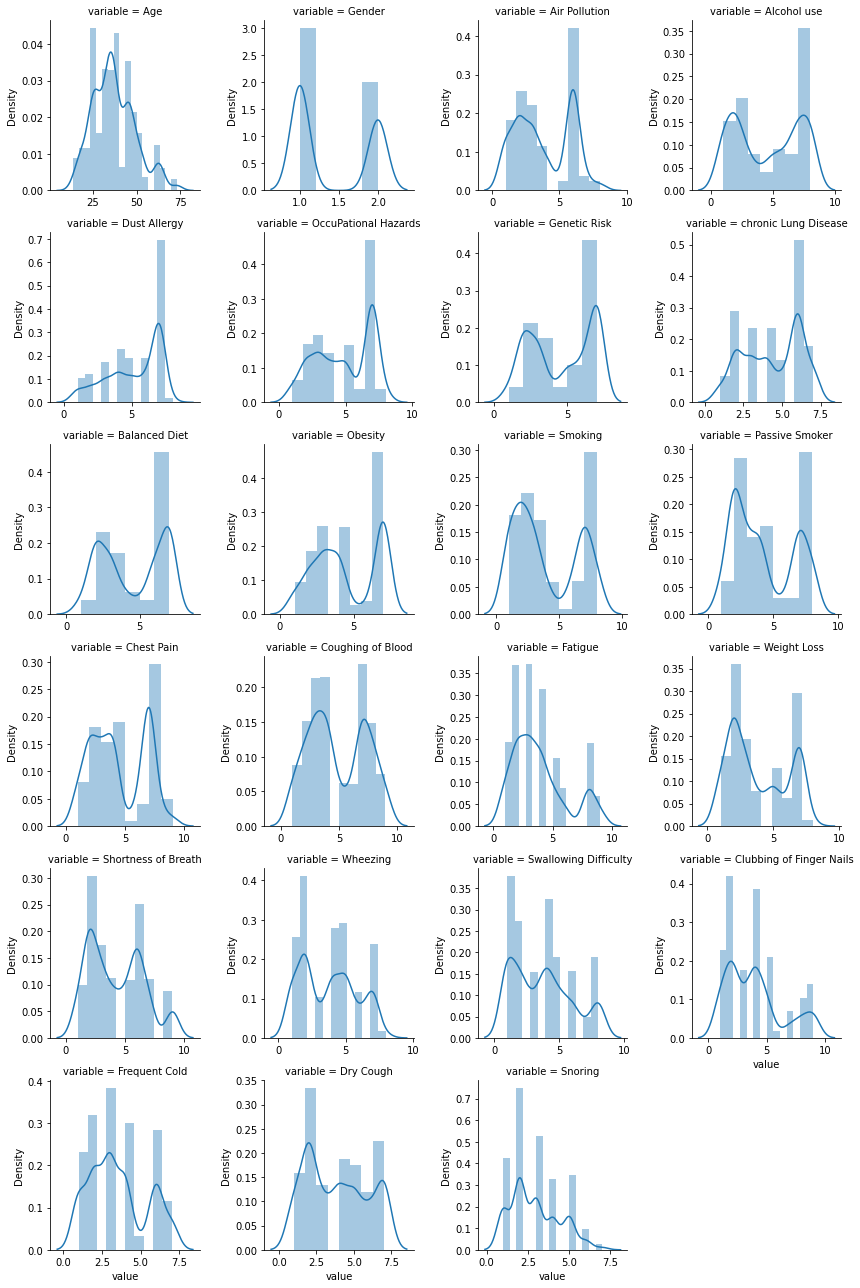

In [23]:
num = [f for f in df.columns if df.dtypes[f] != 'object']
nd = pd.melt(df, value_vars = num)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)
n1 = n1.map(sns.distplot, 'value')
n1

### Observation:
#### With the distplot we get the graphical view of the skewness of the data. With that we get the following observation:
#### 1) 17 Columns are positively skewed.
#### 2) 6 Columns are negatively skewed.


## Heatmap 

### Correlation within feature variables

#### Correlation - A positive correlation is a relationship between two variables in which both variables move in the same direction. Therefore, when one variable increases as the other variable increases, or one variable decreases while the other decreases.

#### Correlation can have a value:
#### 1) 1 is a perfect positive correlation.
#### 2) 0 is no correlation (the values don't seem linked at all).
#### 3) -1 is a perfect negative correlation. 

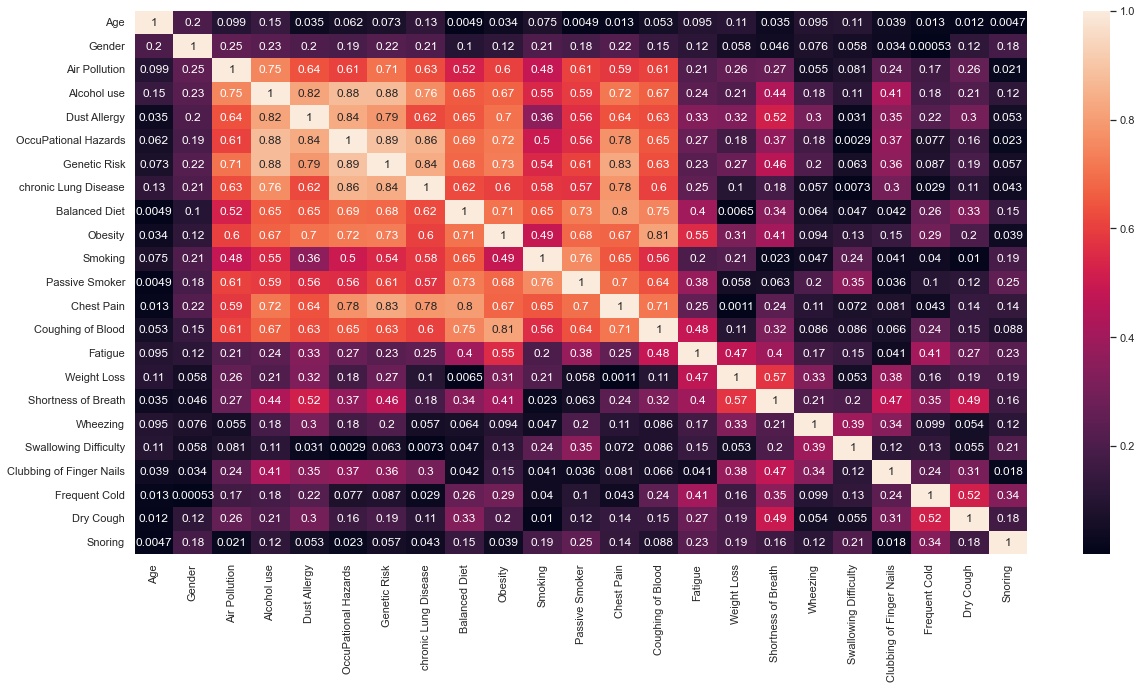

In [24]:
#correlation plot

sns.set(rc = {'figure.figsize':(20,10)})
corr = df.corr().abs()
sns.heatmap(corr,annot=True)
plt.show()

In [25]:
df['Level'] = df['Level'].map({'Low':0,'Medium':1,'High':2})

C:\Users\nuyap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


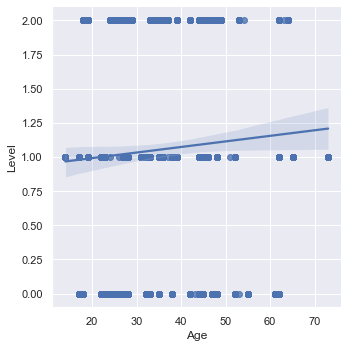

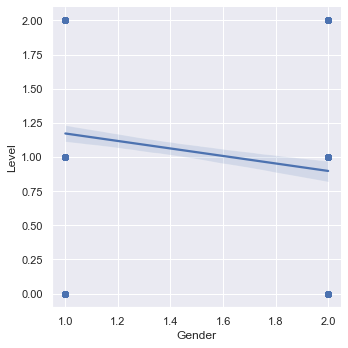

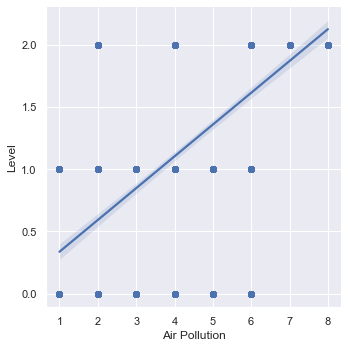

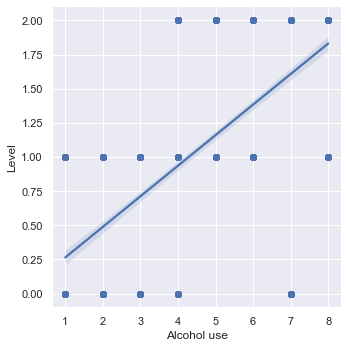

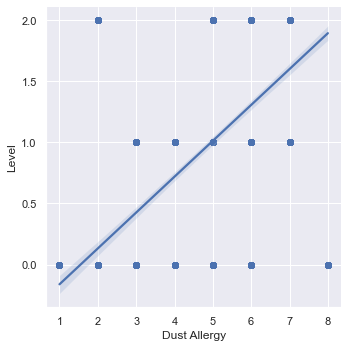

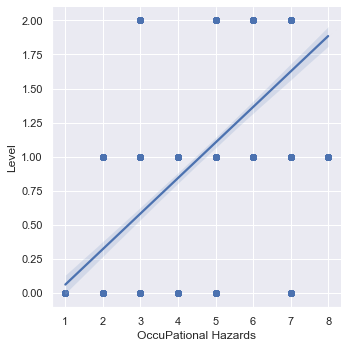

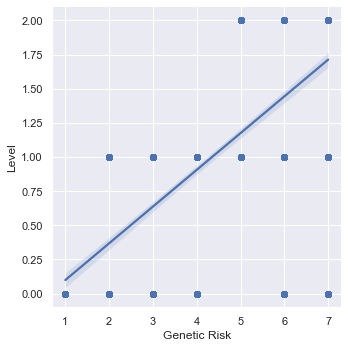

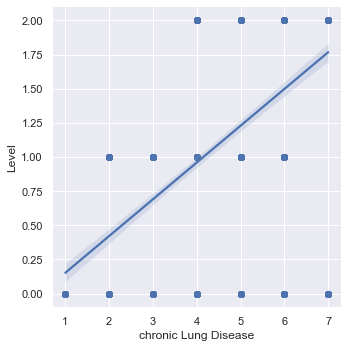

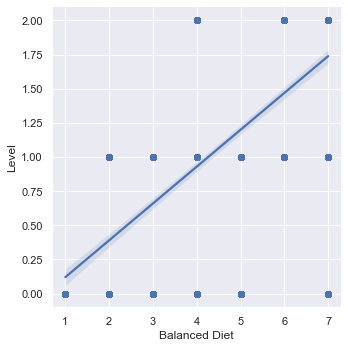

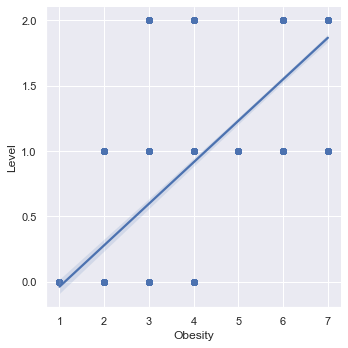

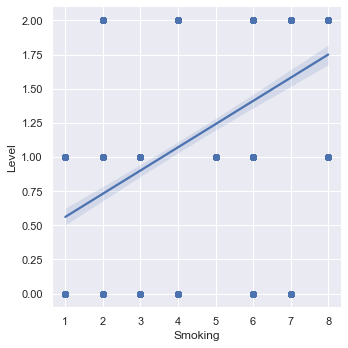

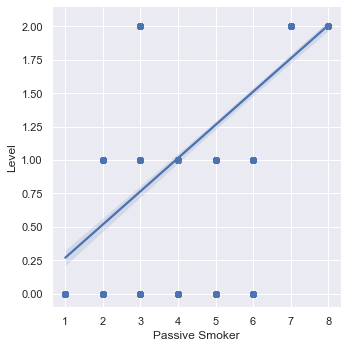

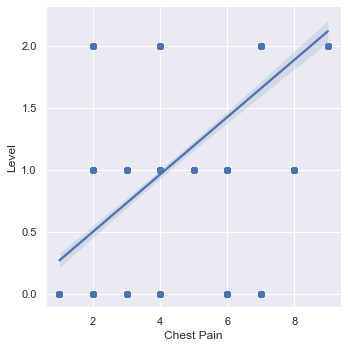

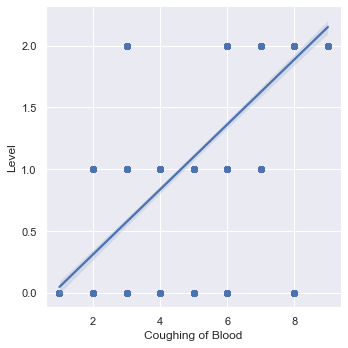

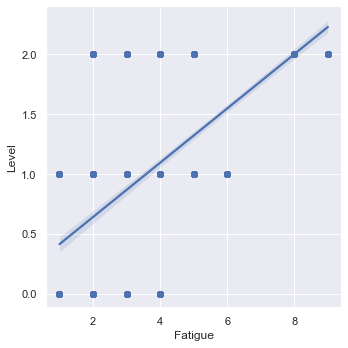

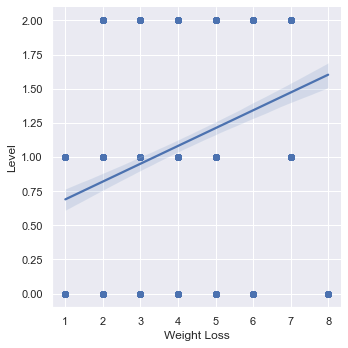

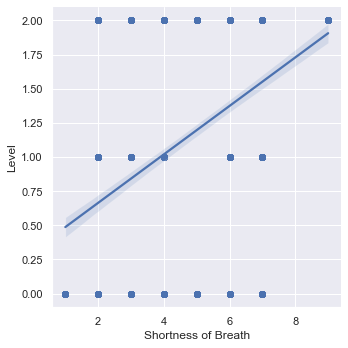

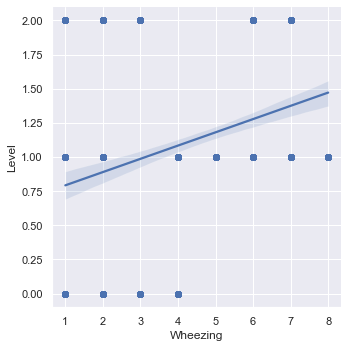

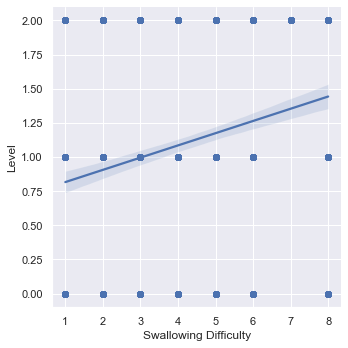

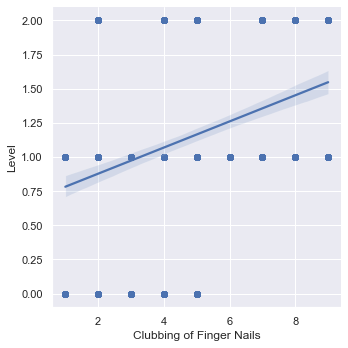

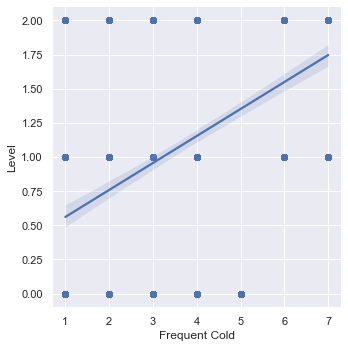

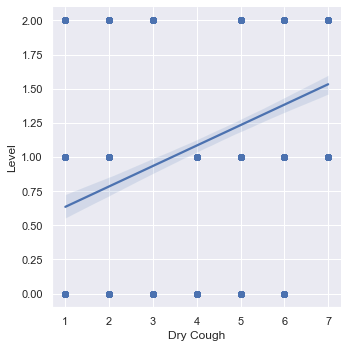

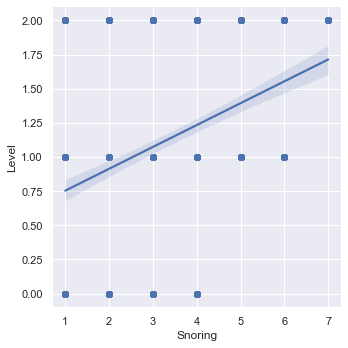

In [26]:
for value in int64_lst_col:
    sns.lmplot(x=value, y="Level", data=df);

plt.show()

# Boxplot

### Outliers
#### In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. 

C:\Users\nuyap\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


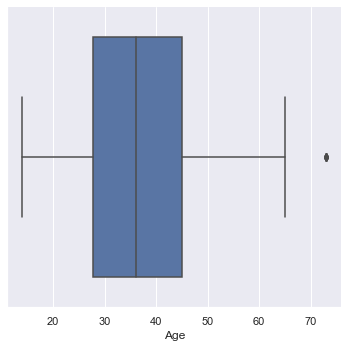

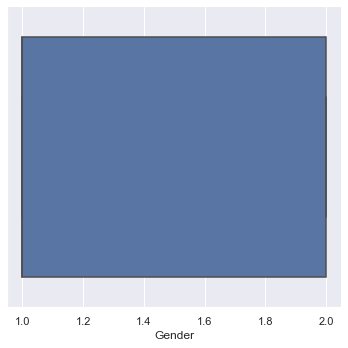

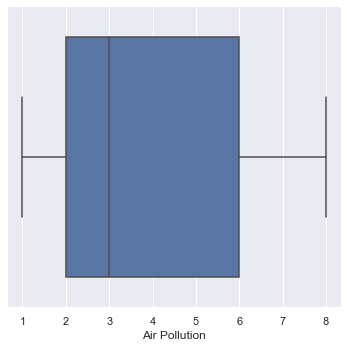

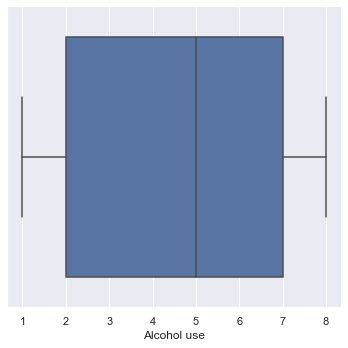

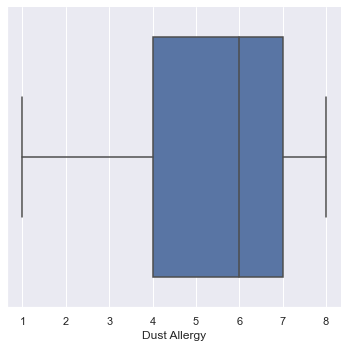

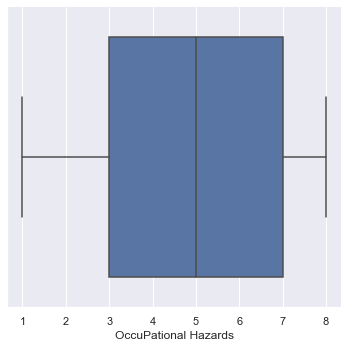

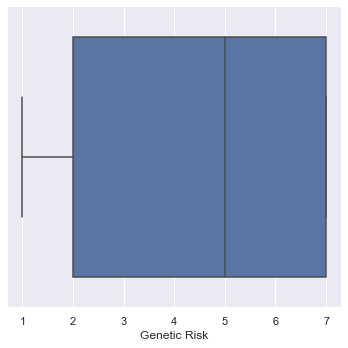

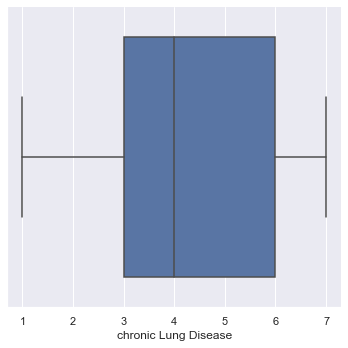

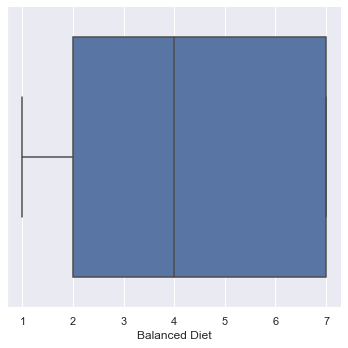

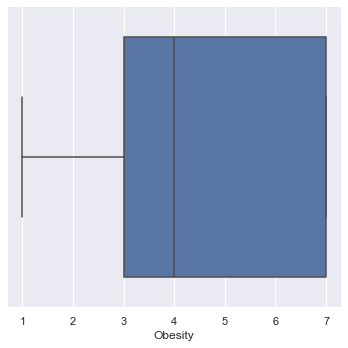

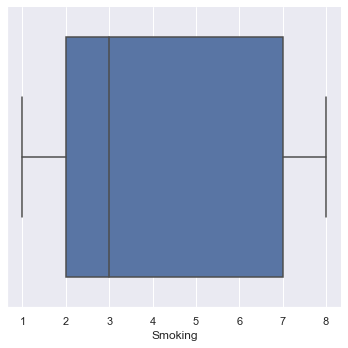

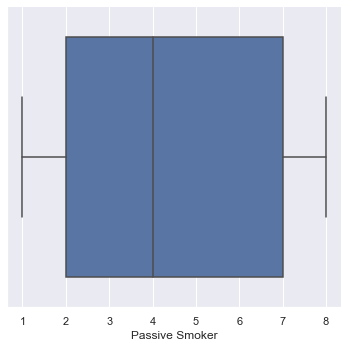

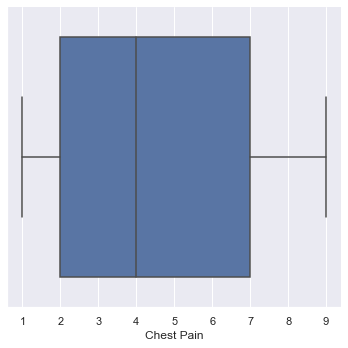

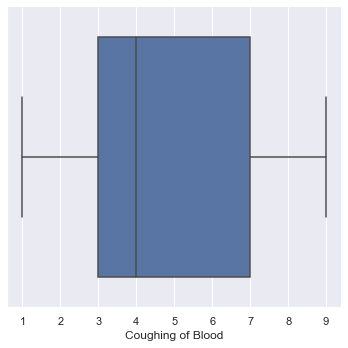

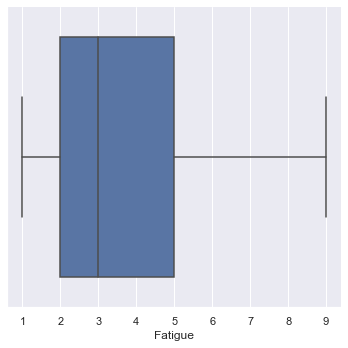

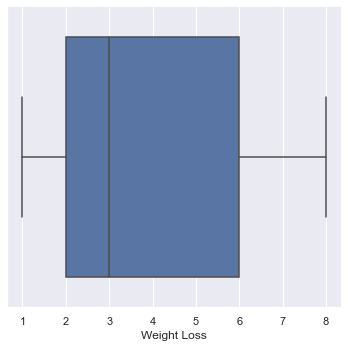

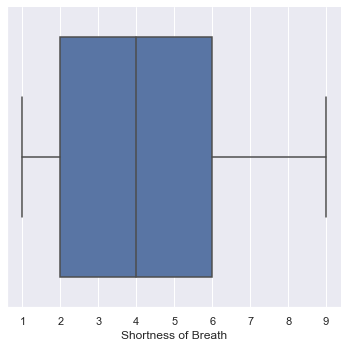

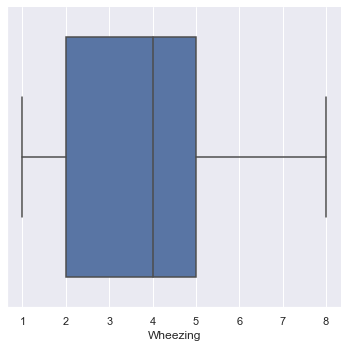

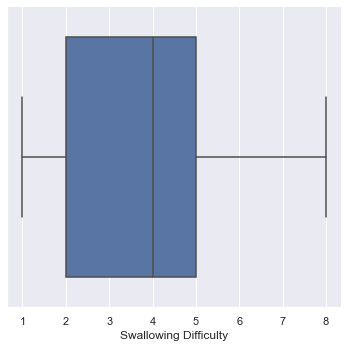

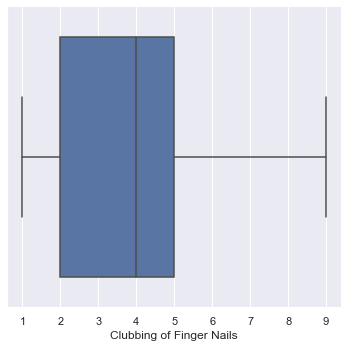

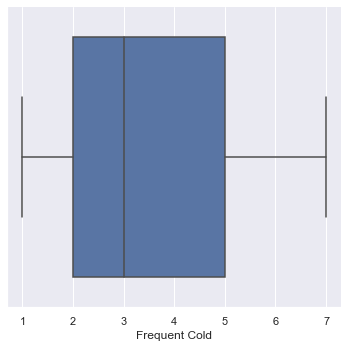

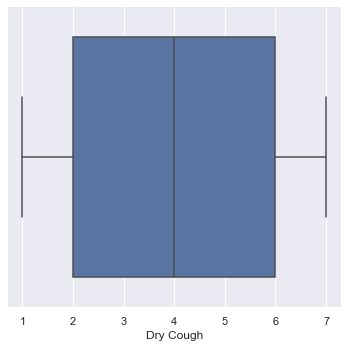

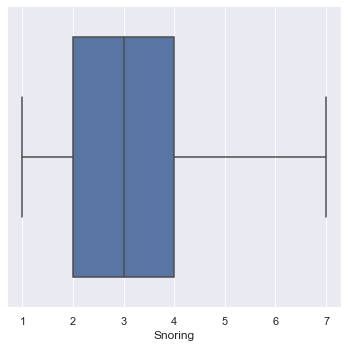

In [27]:
for value in int64_lst_col:
    sns.catplot(data=df, x=value, kind="box")
    
plt.show()

## Observation:
#### As we can see that there are no outliers present in the data which is very good for us. As we can proceed without any complex processing over data. And we also dont need to do scaling.

### Before moving we will divide our target and feature variable.


In [28]:
X = df.drop(['Level'],axis=1)
y = df['Level']


In [29]:
X.shape, y.shape

((1000, 23), (1000,))

In [30]:
#Reshaping of y is required
y = y.values.reshape(-1,1)

In [31]:
X.shape, y.shape

((1000, 23), (1000, 1))

### Split dataset into train and test dataset 

#### Here we are spliting our dataset into 70/30 percentage where 70% dataset goes into the training and 30% goes into testing the part. 

In [32]:
# Split the X and y into X_train, X_test, y_train, y_test variables with 70-30% split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [33]:
# Check shape of the splitted variables
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((700, 23), (300, 23), (700, 1), (300, 1))

# Model Training 

# In this step we are going to train our dataset on different Machine Learning algorithms. As we know that our target variable is not in continous format so we have to apply classification algorithms.

### Algorithms we are going to use in this step are:

#### 1)Logistic Regression
#### 2)Decision Tree
#### 3)Random Forest

## Logistic Regression

In [34]:
#Importing Algorithms libraries in there respective call only.
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression


In [35]:
# Declaring Logistic regression model object
log_reg = LogisticRegression()

In [36]:
# Train or fit Train dataset on Logistic regression model
log_reg.fit(X_train,y_train)




C:\Users\nuyap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\nuyap\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [37]:
# predict the values on X_test_scaled dataset 
y_predicted = log_reg.predict(X_test)

In [38]:
#Accuracy Check
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predicted)*100
print("Accuracy of Logistic Regression is: -",acc)


Accuracy of Logistic Regression is: - 99.66666666666667


## Decision Tree 

In [39]:
#Importing Libraries
from sklearn import tree

In [40]:
dec_tree = tree.DecisionTreeClassifier()
dec_tree = dec_tree.fit(X_train,y_train)

In [41]:
y_predicted = dec_tree.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_predicted)*100
print("Accuracy of Decision Tree is: -",acc)

Accuracy of Decision Tree is: - 100.0


## Random Forest 

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
ran_clf = RandomForestClassifier(max_depth=2, random_state=0)

In [45]:
ran_clf.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=2, random_state=0)

In [47]:
y_predicted = ran_clf.predict(X_test)

In [48]:
acc = accuracy_score(y_test, y_predicted)*100
print("Accuracy of Random Forest is: -",acc)

Accuracy of Random Forest is: - 97.0


# Pickle Model Creation

In [49]:
import pickle
pickle.dump(log_reg, open('lung_cancer_detection_Logistic.pkl', 'wb'))
pickle.dump(dec_tree, open('lung_cancer_detection_Decision.pkl', 'wb'))
pickle.dump(ran_clf, open('lung_cancer_detection_Random.pkl', 'wb'))

In [50]:
import pickle

def model_prediction(features, model):
    
    pickled_model = pickle.load(open(model, 'rb'))
    lung_cancer_detect = str((list(pickled_model.predict(features))))
    
    return str(lung_cancer_detect)

In [51]:
print(model_prediction(X_test.iloc[0:1,:],'lung_cancer_detection_Logistic.pkl'))
print(model_prediction(X_test.iloc[0:1,:],'lung_cancer_detection_Decision.pkl'))
print(model_prediction(X_test.iloc[0:1,:],'lung_cancer_detection_Random.pkl'))

[1]
[1]
[1]


## Observation:
#### In this step we save our model in pickel file format so we can use it now anywhere for prediction purpose 